In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split,GridSearchCV

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


**Problem 2: Logistic Regression, LDA and CART**

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

**Data Dictionary:**

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

**2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.**

**Read the dataset**

In [2]:
df = pd.read_excel("Contraceptive_method_dataset.xlsx")

In [3]:
# 1st five rows of the dataset:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [5]:
# Last five rows of the dataset:
df.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


* There are 1473 Rows aand 10 columns present in the Dataset.
* Datatype of Husband_occupation column is Numeric here which we don't need to change it to Categorical column bcoz for model building we need numeric column only..
* Null Values are present in Wife_age and No_of_children_born columns.

In [5]:
df.shape

(1473, 10)

**Five point summary:**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


**Observations:**

* Maximum no of children born is 16 ,which doesn't seems normal distribution in the data.
* This column shows the presence of outliers.
* Also the column is Right skewed.

**Check for duplicate data**

In [7]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 80
(1473, 10)


**Removing Duplicate Rows**

* It is necessary to treat duplicated rows as it will create bias in our model. 
* It is better to remove the corresponding rows present in our dataset.

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(1393, 10)


**Geting unique counts of all Objects**

In [10]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print(feature,"---->")
        #print("\t")
        print(df[feature].value_counts())
        print("\n")

Wife_ education ---->
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64


Husband_education ---->
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion ---->
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64


Wife_Working ---->
No     1043
Yes     350
Name: Wife_Working, dtype: int64


Standard_of_living_index ---->
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure  ---->
Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used ---->
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64




* There is no discrepancies or unusual chacharter/word present in the categorical columns.
* No data cleaning required in categorical column.

In [11]:
df['No_of_children_born'].value_counts()

2.0     258
1.0     257
3.0     232
4.0     180
5.0     126
0.0      92
6.0      88
7.0      49
8.0      45
9.0      16
10.0     11
11.0     11
12.0      4
13.0      2
16.0      1
Name: No_of_children_born, dtype: int64

In [12]:
df[df['Contraceptive_method_used']=='Yes']

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
415,33.0,Secondary,Secondary,6.0,Scientology,No,3,Very High,Exposed,Yes
416,46.0,Tertiary,Secondary,5.0,Scientology,No,1,Very High,Exposed,Yes
417,35.0,Tertiary,Tertiary,4.0,Scientology,No,1,Very High,Exposed,Yes
418,26.0,Tertiary,Tertiary,2.0,Scientology,Yes,1,Very High,Exposed,Yes
419,36.0,Secondary,Secondary,5.0,Scientology,Yes,1,High,Exposed,Yes
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes


In [13]:
df[df['Contraceptive_method_used']=='No']

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1209,46.0,Tertiary,Tertiary,6.0,Scientology,No,1,Very High,Exposed,No
1210,33.0,Secondary,Secondary,3.0,Scientology,No,3,Very High,Exposed,No
1211,49.0,Uneducated,Primary,5.0,Scientology,Yes,2,Low,Not-Exposed,No
1212,21.0,Primary,Tertiary,3.0,Scientology,No,3,Low,Exposed,No


In [14]:
df['Contraceptive_method_used'].value_counts()

Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64

**Checking the spread of the data using boxplot for the continuous variables.**

In [15]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

Boxplot of Wife_age:


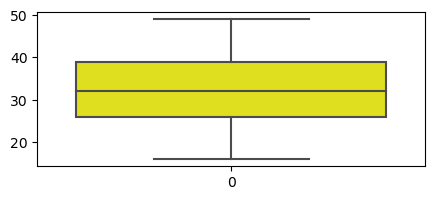

Boxplot of No_of_children_born:


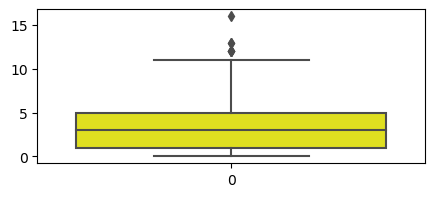

In [16]:
#fig=plt.figure(figsize=(5,2))
cols= ['Wife_age','No_of_children_born']
for i in cols:
    fig=plt.figure(figsize=(5,2))
    #plt.subplot(1,2,i+1)
    print('Boxplot of {}:'.format(i))
    sns.boxplot(df[i],whis=1.5,color='yellow')
    #plt.tight_layout()
    plt.show()

**Checking for Null values:**

In [17]:
df.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

**Null Value Treatment:**

* We can impute the null values for 'wife_age' column using mean method, since there are no Outliers present in this column as can be seen from the boxplot shown above.
* For 'No_of_children_born' column we can use median method to impute the Null values because of Outliers present in the column.

In [18]:
df['Wife_age'].mean()

32.55731523378582

In [19]:
df['Wife_age'] = df[['Wife_age']].apply(lambda x : x.fillna(x.mean()))
df['No_of_children_born'] = df[['No_of_children_born']].apply(lambda x : x.fillna(x.median()))

In [20]:
df[['Wife_age','No_of_children_born']].isnull().sum()

Wife_age               0
No_of_children_born    0
dtype: int64

In [21]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 152.0+ KB


**Univariate Analysis**

In [23]:
df.head(1)

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No


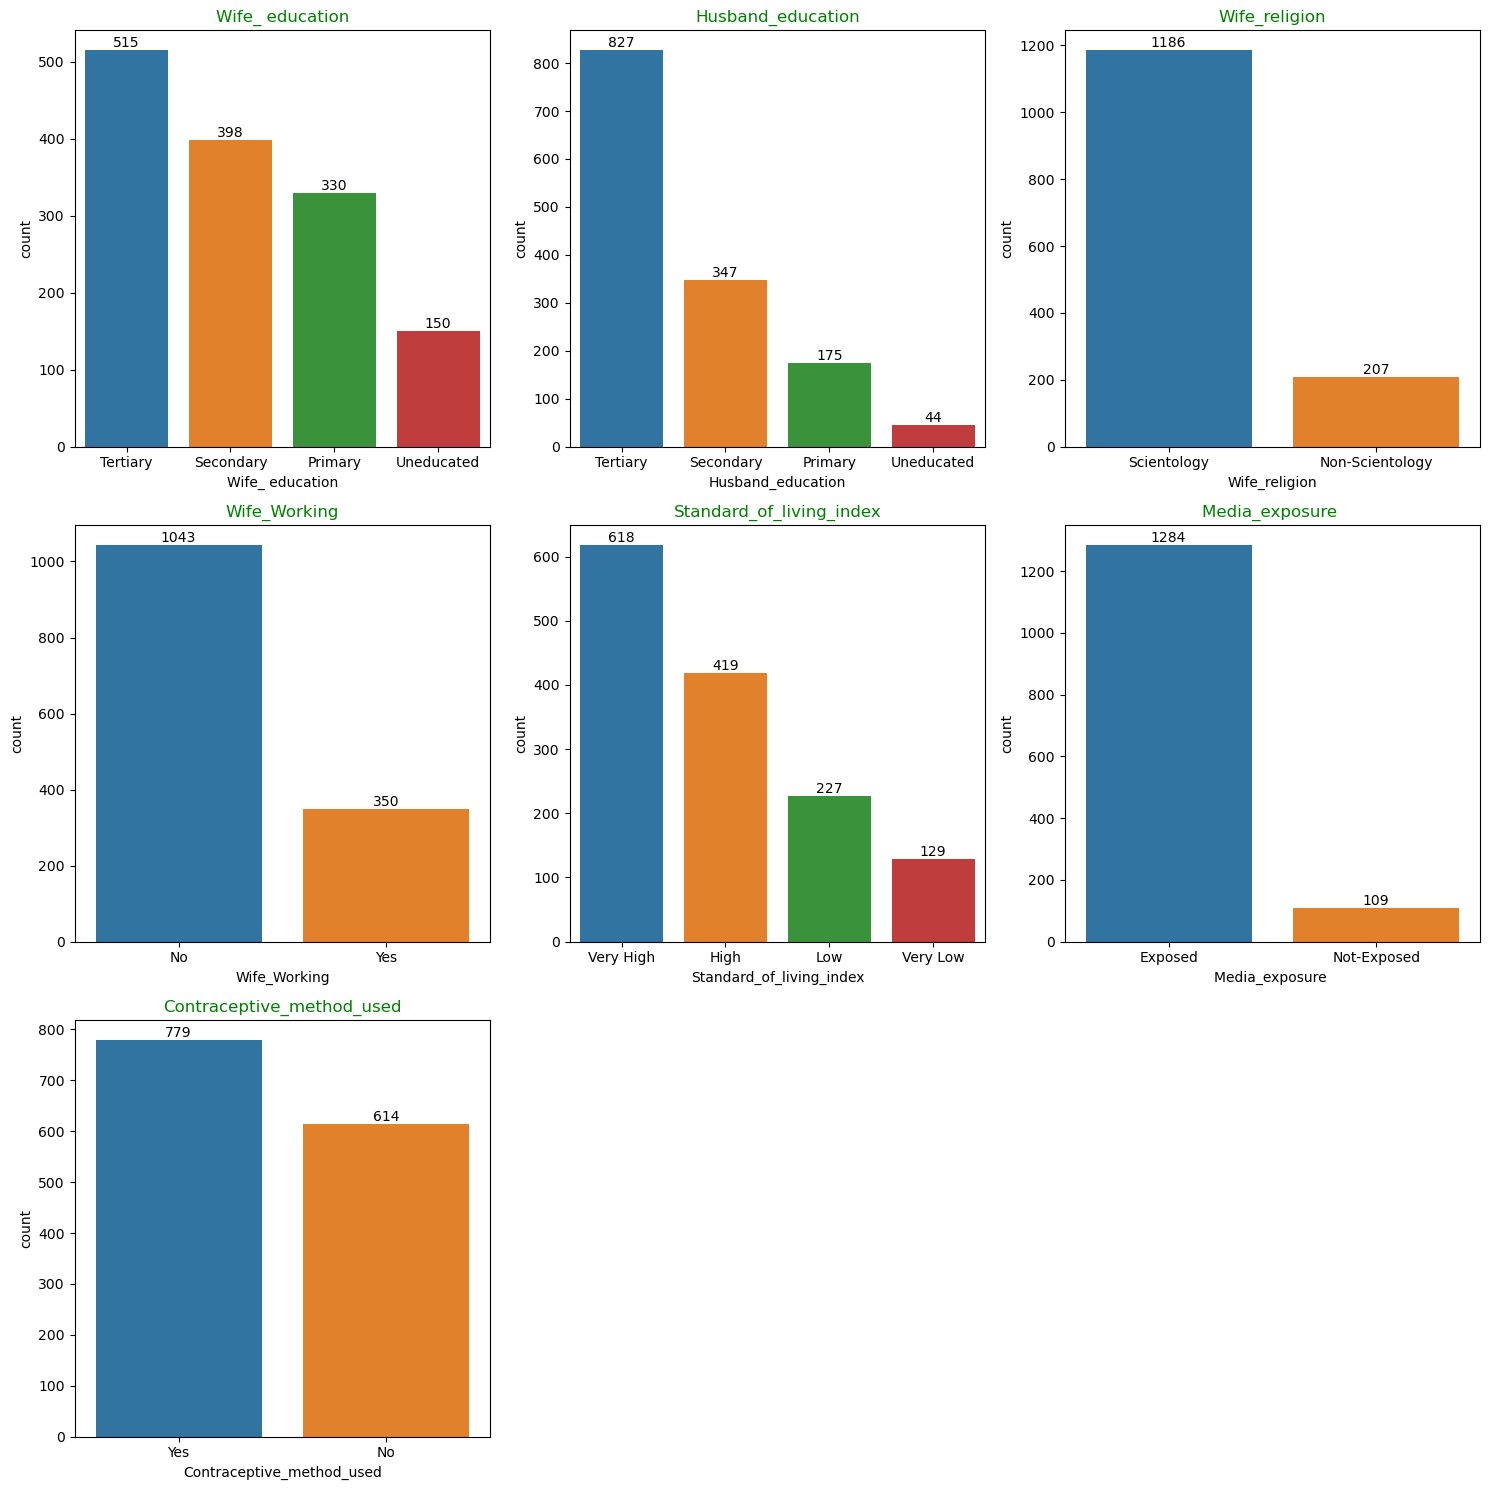

In [25]:
# Countplot of all the Categorical Variables.
fig=plt.figure(figsize=(15,15))
cols = df.select_dtypes(include='object').columns
for i in range(0,len(cols)):    
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x=df[cols[i]],data=df,order=df[cols[i]].value_counts().index)
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.title("{}".format(cols[i]),color='green')
    plt.tight_layout()     

**Observations:**

* Tertiary level of education is higher for both Husband and Wife.
* There are more number of Educated men and Women as compared to Uneducated one.
* There are more Uneducated wives than Husbands.
* Most of them follow Scientology as religion.
* Non-working women are much higher as compared to working women.
* Major portion of the people are from the areas where the standard of living is Very High and High.
* Almost 227 people have 'Low' standards of living and 129 have 'very low' level of living.
* Majority of the women have used a contraceptive method, however there is a good proportion as well who have not used any.
* Majority of the people are Exposed to Media almost 1248 people as compared to 109 people who are not exposed to media.

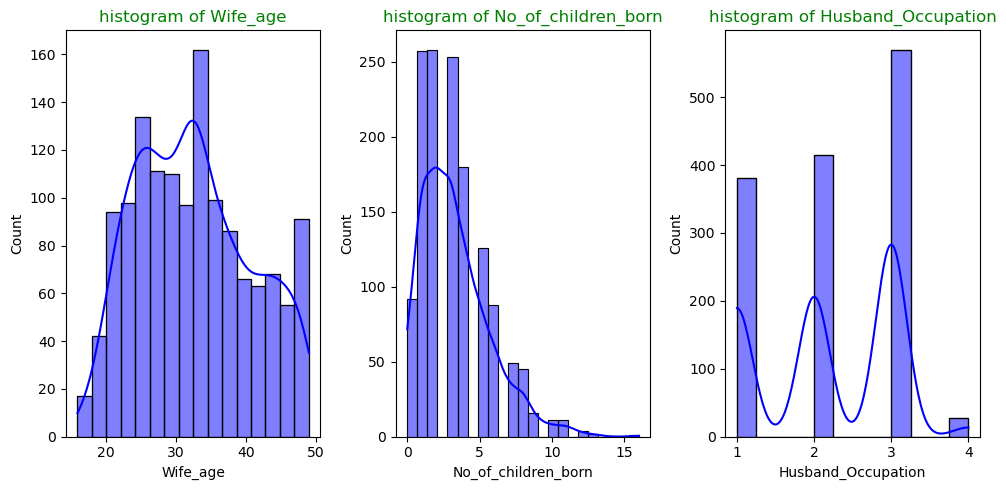

In [34]:
# Histogram of all continuous variables of the data frame "df"

plt.figure(figsize=(10,5))
col2 = df.describe().columns
for i in range (len(col2)):
    plt.subplot(1,3,i+1)
    sns.histplot(x=df[col2[i]],data=df,color='blue',kde=True)
    plt.title("histogram of {}".format(col2[i]),color='green')
    plt.tight_layout()
    #plt.show()

* 'No_of_children_born' columns is Right Skewed,showing the presence of Outliers.
* The age group of women is from 16 to 49.
* Majority of the people have 1 or 4 children but a few have more than 10 children as well and max is 16.

<Axes: >

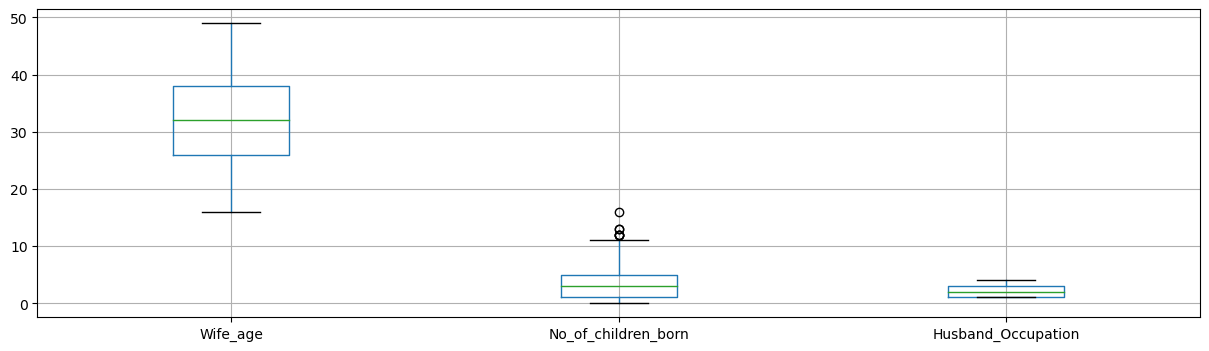

In [144]:
# Boxplot of all Continuous features

df.boxplot(figsize=(15,4))

* Outlier is present in column 'No_of_children_born'.

In [102]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

**Bivariate Analysis**

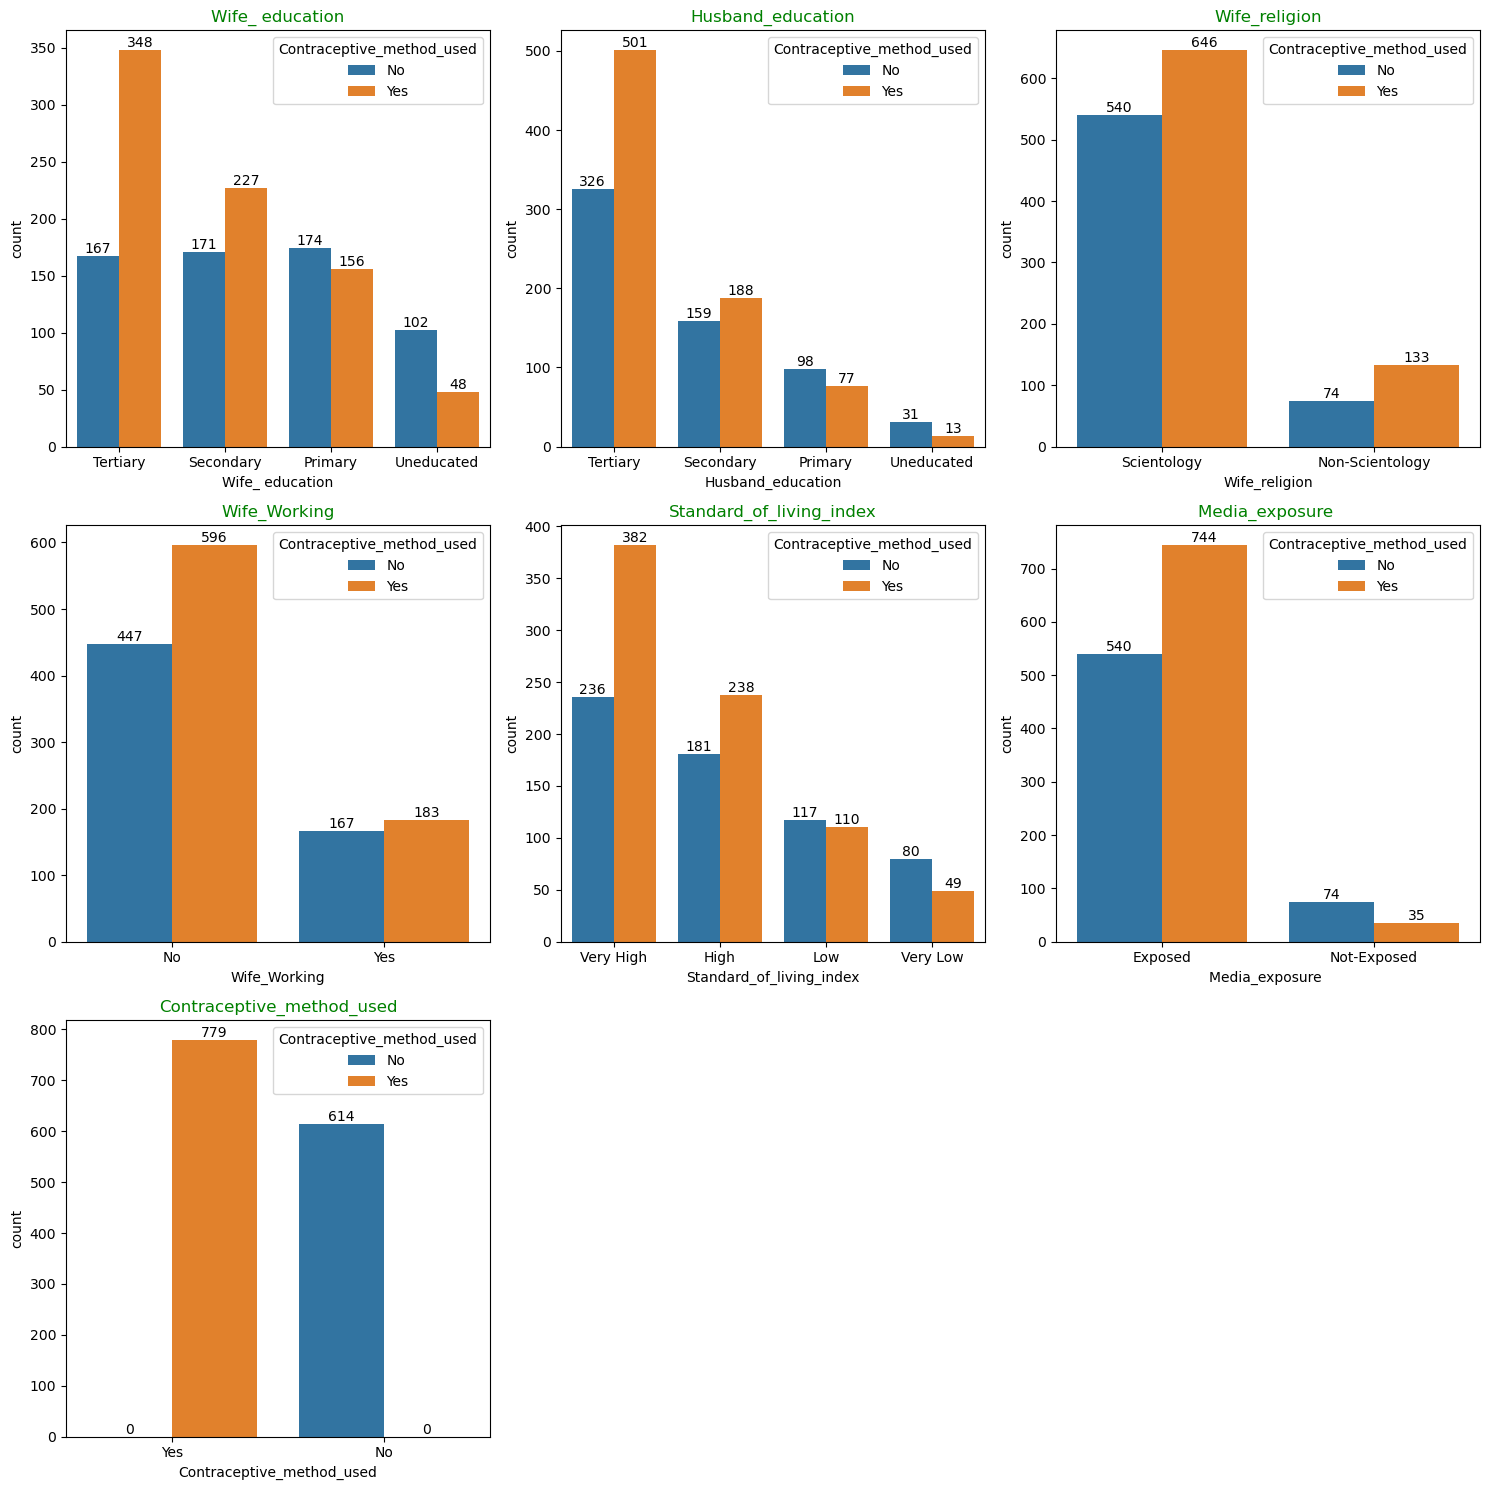

In [110]:
# Countplot of all the Categorical Variables.
fig=plt.figure(figsize=(15,15))
cols = df.select_dtypes(include='object').columns
for i in range(0,len(cols)):    
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x=df[cols[i]],data=df,order=df[cols[i]].value_counts().index,hue='Contraceptive_method_used')
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.title("{}".format(cols[i]),color='green')
    plt.tight_layout()     

**Observations:**

* Women who have completed their secondary and Tertiary education use contraceptive methods more as compared to the others.
* Uneducated Women tends to use less contracepltive methods.
* Similar finding can be seen based on the Husband’s education level.
* Women belonging to Scientology Religion tends to use more Conracrptives.
* Non-Working women uses more Contraceptives.
* People belonging to Very high standard of living use more contraceptives.
* Media Exposure plays an important role in using contraceptives methods.

<Axes: xlabel='Contraceptive_method_used', ylabel='Wife_age'>

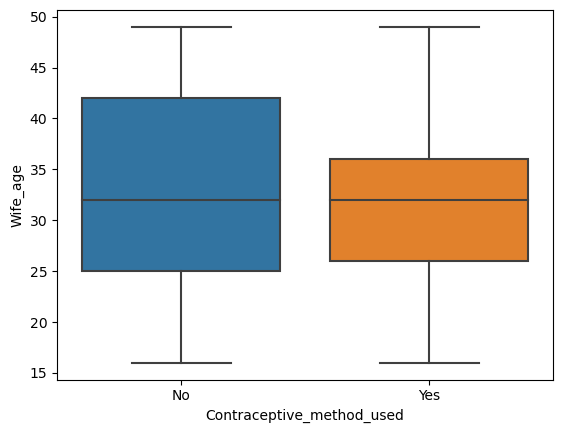

In [113]:
sns.boxplot(data=df,y='Wife_age',x='Contraceptive_method_used')

<Axes: xlabel='No_of_children_born', ylabel='Count'>

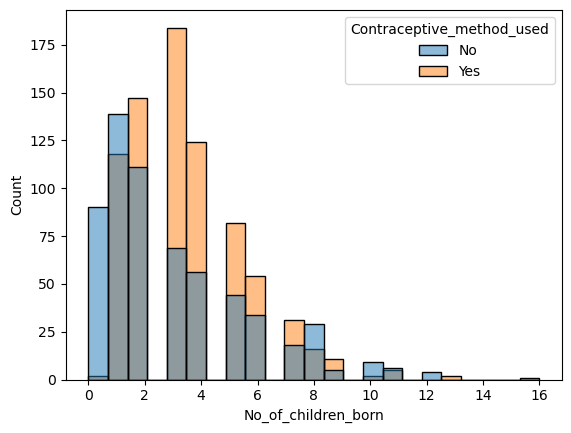

In [112]:
sns.histplot(data=df,x='No_of_children_born',hue='Contraceptive_method_used')

* Majority of the women are using contraceptives after 3 childern.

In [35]:
df.head(1)

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No


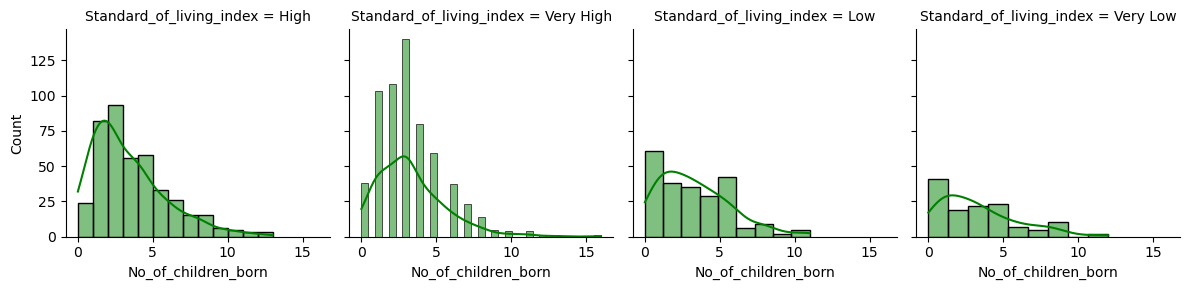

In [35]:
g = sns.FacetGrid(df, col="Standard_of_living_index")
g.map(sns.histplot, "No_of_children_born",kde=True,color='green');

* No_of_children_born is maximum whose standard of living index is very High.

**Checking for Correlations.**

In [36]:
df.corr()

C:\Users\Shobha\AppData\Local\Temp\ipykernel_10580\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Wife_age,No_of_children_born,Husband_Occupation
Wife_age,1.000000,0.528918,-0.185913
No_of_children_born,0.528918,1.000000,-0.024213
Husband_Occupation,-0.185913,-0.024213,1.000000


C:\Users\Shobha\AppData\Local\Temp\ipykernel_10580\1195212968.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='BrBG',mask=np.triu(df.corr(),+1));


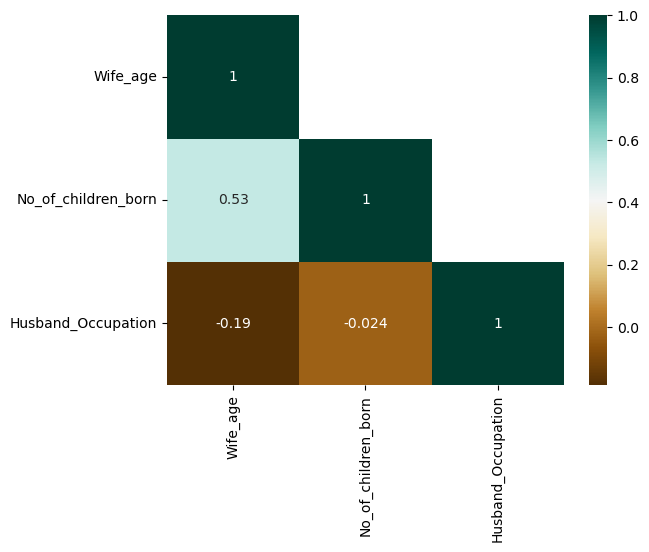

In [37]:
# plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True,cmap='BrBG',mask=np.triu(df.corr(),+1));

* There is some Correlation between Wife_age and No_of_children_born.

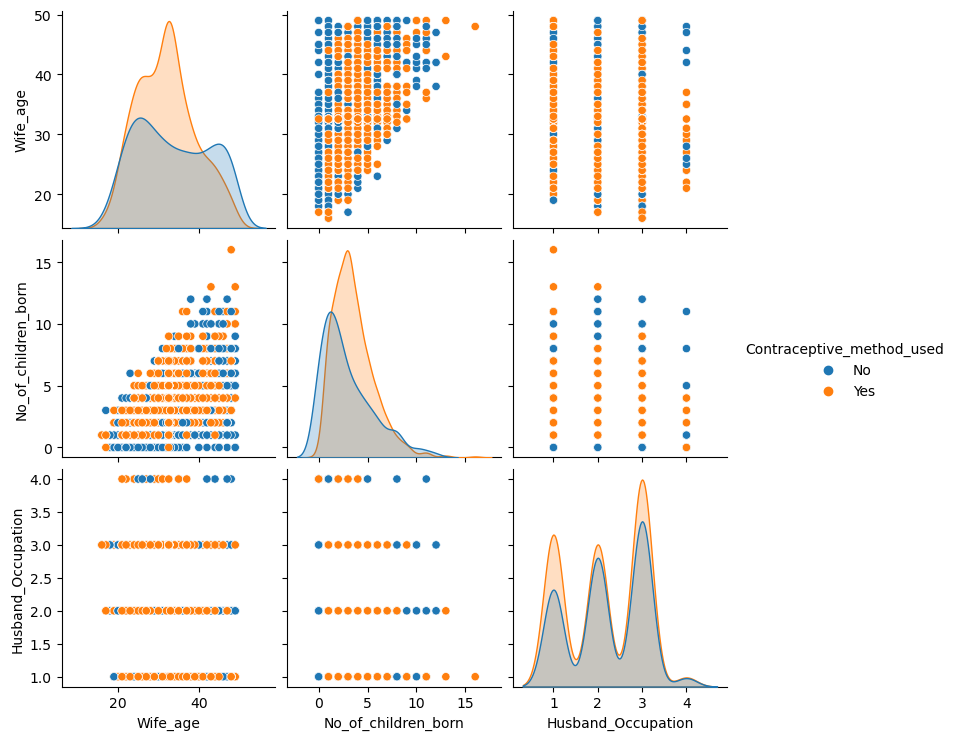

In [160]:
sns.pairplot(df,hue='Contraceptive_method_used')

* We can observe that as the Wife's age in increasing the number of child born is also increasing.
* We cal also observe that child born is more in the case of Contraceptive method used which doesn't seems normal.
* This case may be due to the wrong data entered in the column as we can see there are also Outliers present in this column.

**Outlier Treatment**

* We can treat Outliers with the following code. We will treat the outliers for the 'No_of_children_born' variable only.

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
lr,ur=remove_outlier(df['No_of_children_born'])
print("Lower Range: ",lr,"\nUpper Range: ",ur)
df['No_of_children_born'] = np.where(df['No_of_children_born']>ur,ur,df['No_of_children_born'])
df['No_of_children_born'] = np.where(df['No_of_children_born']<lr,lr,df['No_of_children_born'])

Lower Range:  -5.0 
Upper Range:  11.0


**Boxplot after Outlier Treatment**

Text(0.5, 1.0, 'Boxplot After Outlier Treatment')

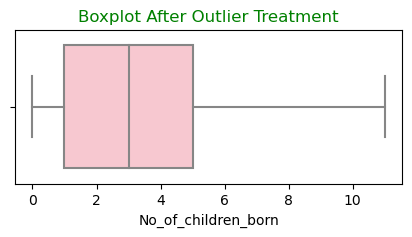

In [20]:
plt.figure(figsize=(5,2))
sns.boxplot(data=df,x='No_of_children_born',color='pink')
plt.title('Boxplot After Outlier Treatment',color='green')

* Outliers removed Successfully.

In [68]:
df['No_of_children_born'].describe()

count    1393.000000
mean        3.277100
std         2.345673
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: No_of_children_born, dtype: float64

**2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.**

### Encoding The Data:-

**Converting all objects to categorical codes: Giving Ordinal numbers to these columns-->**

* Wife's education (categorical) 1=uneducated, 2=Primary, 3=Secondary, 4=Tertiary
* Husband's education (categorical) 1=uneducated, 2=Primary, 3=Secondary, 4=Tertiary
* Standard-of-living index (categorical) 1=Very Low, 2=Low, 3=High, 4=Very High

In [26]:
df['Wife_ education'] = np.where(df['Wife_ education']=='Uneducated', '1', df['Wife_ education'])
df['Wife_ education'] = np.where(df['Wife_ education']=='Primary', '2', df['Wife_ education'])
df['Wife_ education'] = np.where(df['Wife_ education']=='Secondary', '3', df['Wife_ education'])
df['Wife_ education'] = np.where(df['Wife_ education']=='Tertiary', '4', df['Wife_ education'])


In [27]:
df['Husband_education'] = np.where(df['Husband_education']=='Uneducated', '1', df['Husband_education'])
df['Husband_education'] = np.where(df['Husband_education']=='Primary', '2', df['Husband_education'])
df['Husband_education'] = np.where(df['Husband_education']=='Secondary', '3', df['Husband_education'])
df['Husband_education'] = np.where(df['Husband_education']=='Tertiary', '4', df['Husband_education'])

In [28]:
df['Standard_of_living_index']=np.where(df['Standard_of_living_index']=='Very Low','1',df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index']=='Low','2',df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index']=='High','3',df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index']=='Very High','4',df['Standard_of_living_index'])

In [29]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,Scientology,No,2,3,Exposed,No
1,45.0,1,3,10.0,Scientology,No,3,4,Exposed,No
2,43.0,2,3,7.0,Scientology,No,3,4,Exposed,No
3,42.0,3,2,9.0,Scientology,No,3,3,Exposed,No
4,36.0,3,3,8.0,Scientology,No,3,2,Exposed,No


In [30]:
# Converting the 'Wife_ education','Husband_education','Standard_of_living_index' variables to numeric

df['Wife_ education'] = df['Wife_ education'].astype('int64')
df['Husband_education'] = df['Husband_education'].astype('int64')
df['Standard_of_living_index'] = df['Standard_of_living_index'].astype('int64')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 152.0+ KB


**Eccoding Target Variable to 0 and 1**

* 1 IS DECIDED TO BE YES AS THAT IS THE CLASS OF INTEREST AS DEFINED BY THE PROBLEM STATEMENT.
* 'Yes' is replaced by 1 and 'No' is replaced by 0.

In [32]:
df['Contraceptive_method_used'] = df['Contraceptive_method_used'].replace({'Yes':1, 'No':0})

In [33]:
df['Contraceptive_method_used'].value_counts()

1    779
0    614
Name: Contraceptive_method_used, dtype: int64

**Dummy Variable Encoding:**

* Converting the other 'object' type variables as dummy variables

In [34]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index,Contraceptive_method_used,Wife_religion_Scientology,Wife_Working_Yes,Media_exposure _Not-Exposed
0,24.0,2,3,3.0,2,3,0,1,0,0
1,45.0,1,3,10.0,3,4,0,1,0,0
2,43.0,2,3,7.0,3,4,0,1,0,0
3,42.0,3,2,9.0,3,3,0,1,0,0
4,36.0,3,3,8.0,3,2,0,1,0,0


In [35]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wife_age                     1393 non-null   float64
 1   Wife_ education              1393 non-null   int64  
 2   Husband_education            1393 non-null   int64  
 3   No_of_children_born          1393 non-null   float64
 4   Husband_Occupation           1393 non-null   int64  
 5   Standard_of_living_index     1393 non-null   int64  
 6   Contraceptive_method_used    1393 non-null   int64  
 7   Wife_religion_Scientology    1393 non-null   uint8  
 8   Wife_Working_Yes             1393 non-null   uint8  
 9   Media_exposure _Not-Exposed  1393 non-null   uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 123.4 KB


* Now the Datatype of all the variables are Numeric and now we can proceeed with Model Building.

**Train Test Split:**

In [31]:
# Copy all the predictor variables into X dataframe
X = df_dummy.drop('Contraceptive_method_used',axis=1)

# Copy target into the y dataframe.
y = df_dummy['Contraceptive_method_used']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=df_dummy['Contraceptive_method_used'])

In [33]:
y_train.value_counts()

1    545
0    430
Name: Contraceptive_method_used, dtype: int64

In [34]:
y_train.value_counts(1)

1    0.558974
0    0.441026
Name: Contraceptive_method_used, dtype: float64

In [83]:
y_test.value_counts(1)

1    0.559809
0    0.440191
Name: Contraceptive_method_used, dtype: float64

In [35]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (975, 9)
Number of rows and columns of the training set for the dependent variable: (975,)
Number of rows and columns of the test set for the independent variables: (418, 9)
Number of rows and columns of the test set for the dependent variable: (418,)


## Logistic Regression Model

In [85]:
# Fit the Logistic Regression model
lgt_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty=None,verbose=True,n_jobs=2)
lgt_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty=None, solver='newton-cg',
                   verbose=True)

**Predicting on Training and Test dataset:**

In [86]:
ytrain_pred = lgt_model.predict(X_train)
ytest_pred = lgt_model.predict(X_test)

**Getting the Predicted Classes and Probs:**

In [87]:
ytest_pred_prob = lgt_model.predict_proba(X_test)
pd.DataFrame(ytest_pred_prob).head()

,0,1
0,0.284536,0.715464
1,0.618897,0.381103
2,0.336179,0.663821
3,0.298864,0.701136
4,0.244397,0.755603


**Model Evaluation:**

* Finding Accuracy of Training and Test Data.

In [88]:
# Accuracy - Training Data
print("Accuracy of Training Data: ",lgt_model.score(X_train, y_train))

# Accuracy - Test Data
print("Accuracy of Test Data: ",lgt_model.score(X_test, y_test))

Accuracy of Training Data:  0.6758974358974359
Accuracy of Test Data:  0.6483253588516746


## Building LDA Model

* All the Pre-processing step has already been performed above.
* Like EDA,Missing value treatment ,Outlier treatment,Data Encoding and Train-Test split.
* Now we can proceed with Model Building i.e LDA Model.
* Training Data Class Prediction with a cut-off value of 0.5 
* Test Data Class Prediction with a cut-off value of 0.5

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [46]:
#Build LDA Model and fit the data
#Build LDA Model

clf = LinearDiscriminantAnalysis(solver='eigen')
lda_model = clf.fit(X_train,y_train)

**Accuracy of Train and Test data:**

In [47]:
print("Accuracy of Train Data: ",lda_model.score(X_train,y_train))
print("Accuracy of Test Data: ",lda_model.score(X_test,y_test))

Accuracy of Train Data:  0.6779487179487179
Accuracy of Test Data:  0.6291866028708134


## Building CART Model

**Note:**
* Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types.
* The data type of the dataset is converted into integer and now we can proceed with the Model Building.

In [36]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wife_age                     1393 non-null   float64
 1   Wife_ education              1393 non-null   int64  
 2   Husband_education            1393 non-null   int64  
 3   No_of_children_born          1393 non-null   float64
 4   Husband_Occupation           1393 non-null   int64  
 5   Standard_of_living_index     1393 non-null   int64  
 6   Contraceptive_method_used    1393 non-null   int64  
 7   Wife_religion_Scientology    1393 non-null   uint8  
 8   Wife_Working_Yes             1393 non-null   uint8  
 9   Media_exposure _Not-Exposed  1393 non-null   uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 123.4 KB


* Label Encoding has been done and all columns are converted to number.

In [37]:
df_dummy['Contraceptive_method_used'].value_counts(normalize=True)

1    0.559225
0    0.440775
Name: Contraceptive_method_used, dtype: float64

**Extracting the target column into separate vectors for training set and test set¶**

In [38]:
# Copy all the predictor variables into X dataframe
X = df_dummy.drop('Contraceptive_method_used',axis=1)

# Copy target into the y dataframe.
y = df_dummy['Contraceptive_method_used']

In [39]:
X.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Husband_Occupation', 'Standard_of_living_index',
       'Wife_religion_Scientology', 'Wife_Working_Yes',
       'Media_exposure _Not-Exposed'],
      dtype='object')

**Splitting data into training and test set**

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1) # 70% training 30% Testing 

* A CART model is also built using the following parameters:

        * criterion = 'gini',
        * max_depth = 7,
        * min_samples_leaf=30,
        * min_samples_split=50

In [41]:
cart_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=30, min_samples_split=50)
cart_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=30, min_samples_split=50)

**Generating Decission Tree:**

In [42]:
from sklearn import tree
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(cart_dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))
ld_Tree_File.close()

**Accuracy of the Train and Test Dataset:**

In [43]:
print("Accuracy of Training data: ",cart_dt_model.score(X_train, train_labels))
print("Accuracy of Test data: ", cart_dt_model.score(X_test, test_labels))

Accuracy of Training data:  0.7333333333333333
Accuracy of Test data:  0.6722488038277512


**For Performance matrics see section 2.3 below**

**2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.**

## Performance Metrices:
 


**Logistic Regression**

**Classification Report of Training Data:**

In [128]:
print(classification_report(y_train, ytrain_pred))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59       430
           1       0.68      0.79      0.73       545

    accuracy                           0.68       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.68      0.67       975



**Classification Report of Test Data:**

In [129]:
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

           0       0.64      0.46      0.54       184
           1       0.65      0.79      0.72       234

    accuracy                           0.65       418
   macro avg       0.65      0.63      0.63       418
weighted avg       0.65      0.65      0.64       418



**Confusion Matrix for the Training data:**

In [89]:
# Importing libraries.
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [90]:
cm = confusion_matrix(y_train, ytrain_pred)
cm

array([[226, 204],
       [112, 433]], dtype=int64)

Text(0.5, 1.0, 'Confusion Martix for Training Data')

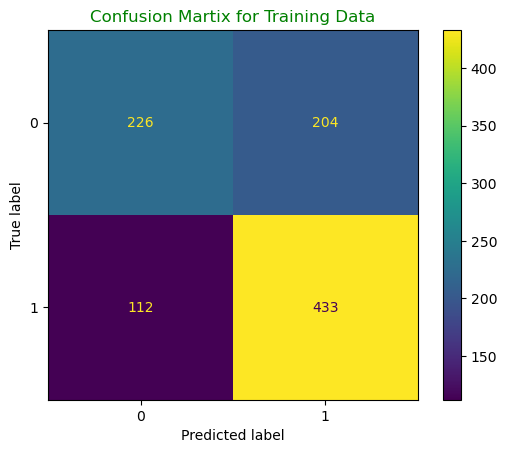

In [91]:
# plt.figure(figsize=(5,2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lgt_model.classes_)
disp.plot()
plt.title("Confusion Martix for Training Data",color='green')

**Confusion Matrix for the Test data:**

In [92]:
cm1 = confusion_matrix(y_test,ytest_pred)
cm1

array([[ 85,  99],
       [ 48, 186]], dtype=int64)

Text(0.5, 1.0, 'Confusion Martix for Test Data')

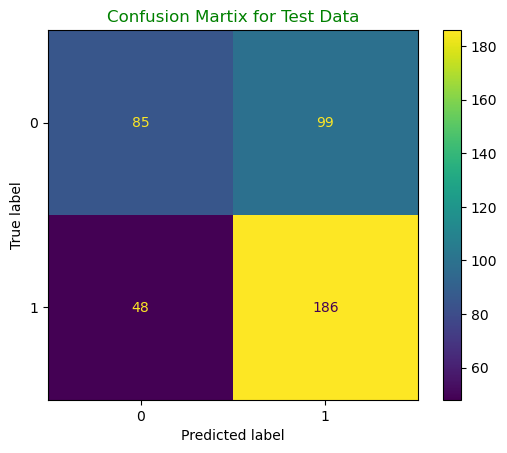

In [93]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=lgt_model.classes_)
disp.plot()
plt.title("Confusion Martix for Test Data",color='green')

**Inferences:**

* The confusion matrix of train data shows that the model predicted 433 True positives values, 226 True negative, 204 false positive and 112 false Negative.
* The confusion matrix of test data shows that the model predicted 186 True positives values, 85 True negative,99 false positive and 48 false Negative.

## AUC and ROC:

- **AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction**

- **ROC Curve visually represents the above concept where the plot should be as far as possible from the diagnol.**

* ROC is a probability curve and AUC represents the classification model’s ability to separate the two classes. 
* The higher the AUC, the more powerful is the model to predict true class membership.


**AUC and ROC for the training data:**

AUC: 0.720


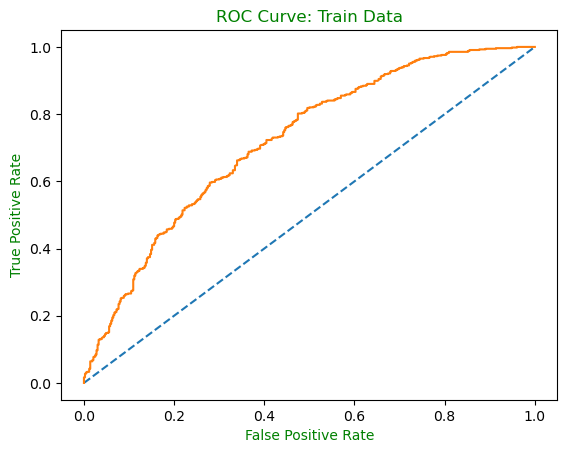

In [135]:
# predict probabilities
probs = lgt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve: Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the test data:**

AUC: 0.665


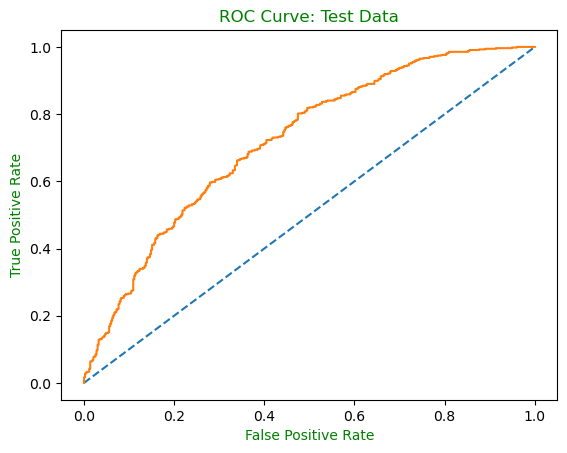

In [137]:
# predict probabilities
probs = lgt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve: Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**Observations:**

* AUC for Train data is 72% and AUC for Test data is 66%.
* From the AUC values & ROC curve for the Train and Test data ,it shows that Test data is not covering a large area as compared to the train data.
* Therefore, there is a need to optimize this model.


**Important Features and their Coefficients:**

In [199]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lgt_model.coef_[0][idx]))

The coefficient for Wife_age is -0.07521379242680283
The coefficient for Wife_ education is 0.5213124033028135
The coefficient for Husband_education is 0.04294381833842849
The coefficient for No_of_children_born is 0.33245722288877055
The coefficient for Husband_Occupation is 0.14547576593766215
The coefficient for Standard_of_living_index is 0.31190496477110663
The coefficient for Wife_religion_Scientology is -0.4332499416554644
The coefficient for Wife_Working_Yes is -0.16919269842352977
The coefficient for Media_exposure _Not-Exposed is -0.3479222248439086


## Optimized Logistic Regression Model:

#### Applying GridSearchCV for Logistic Regression:

In [94]:
grid = {'penalty':['l2','none'],
        'solver':['lbfgs','sag'],
        'tol':[0.0001,0.00001]}

In [95]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [96]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=3, n_jobs=-1,scoring='f1')
             # Number of processors in the CPU core used for the optimization - can be kept as -1 

In [97]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['lbfgs', 'sag'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [98]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [99]:
best_model = grid_search.best_estimator_

In [100]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [101]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.282219,0.717781
1,0.615283,0.384717
2,0.336703,0.663297
3,0.298274,0.701726
4,0.245078,0.754922


In [102]:
# Confusion matrix on the training data
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[225, 205],
       [113, 432]], dtype=int64)

              precision    recall  f1-score   support

           0       0.67      0.52      0.59       430
           1       0.68      0.79      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.67      0.67       975
 



Text(0.5, 1.0, 'Confusion Martix for Training Data')

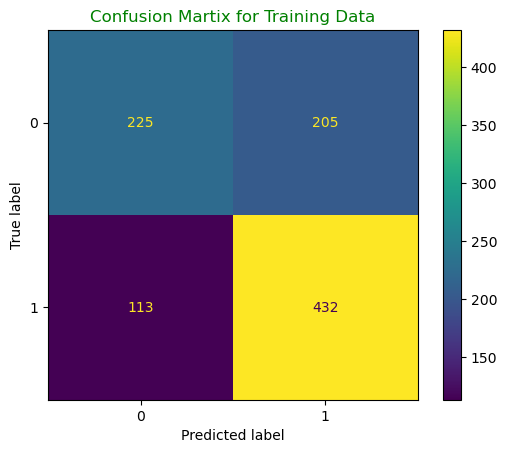

In [103]:
print(classification_report(y_train, ytrain_predict),'\n');
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title("Confusion Martix for Training Data",color='green')


              precision    recall  f1-score   support

           0       0.64      0.46      0.54       184
           1       0.65      0.79      0.72       234

    accuracy                           0.65       418
   macro avg       0.65      0.63      0.63       418
weighted avg       0.65      0.65      0.64       418
 



Text(0.5, 1.0, 'Confusion Martix for Test Data')

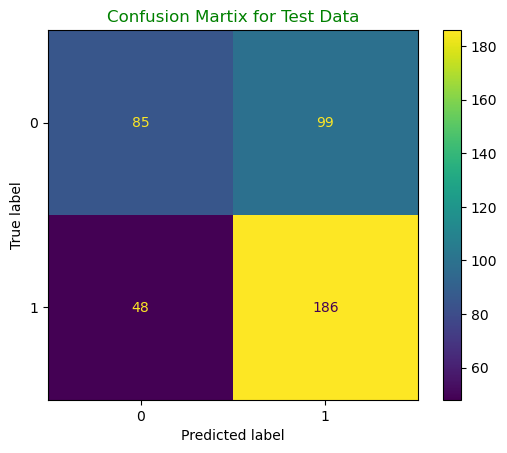

In [104]:
## Confusion matrix on the test data
print(classification_report(y_test, ytest_predict),'\n');
cm = confusion_matrix(y_test, ytest_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title("Confusion Martix for Test Data",color='green')


**Inferences:**

* The confusion matrix of train data shows that the model predicted 433 True positives values, 225 True negative, 205 false positive and 112 false Negative.
* The confusion matrix of test data shows that the model predicted 186 True positives values, 84 True negative,100 false positive and 48 false Negative.

**AUC-ROC Curve:**

In [105]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC Score Train Data : %.3f" %auc)

# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC Score Test Data : %.3f' % test_auc)

AUC Score Train Data : 0.720
AUC Score Test Data : 0.665


## Inferences:

**For predicting Contaceptive_method_used = yes(label 1)**

* **Precision(65%)** -- 65% of the Women predicted are actually using Contracepltive_method out of all the women predicted that use Contraceptive.
* **Recall(79%)** -- Out of all the Women using Contraceptives 79% of the Women have been predicted correctly.

**For predicting Contaceptive_method_used = No(label 0)**

* **Precision(64)** -- 64% of the Women predicted are actually not using Contracepltive_method out of all the women predicted that don't use Contraceptive.
* **Recall(46%)** -- Out of all the Women not using Contraceptives 46% of the Women have been predicted correctly.

**Overall accuracy of the model – 65 % of total predictions are correct.**

Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no
overfitting or underfitting has happened, and overall the model is a good model for classification

## LDA : Performance Matrix

**Prediction and Evaluation on both Training and Test Set using Confusion Matrix, Classification Report and AUC-ROC.**

In [60]:
# Predict it
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = lda_model.predict(X_train) 

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = lda_model.predict(X_test)


**Confusion Matrix for the Training data and Test Data:**

In [61]:
# Training Data:
cm=confusion_matrix(y_train,pred_class_train)
cm

array([[218, 212],
       [106, 439]], dtype=int64)

In [62]:
# Test Data:
cm1 = confusion_matrix(y_test,pred_class_test)
cm1

array([[ 81, 103],
       [ 46, 188]], dtype=int64)

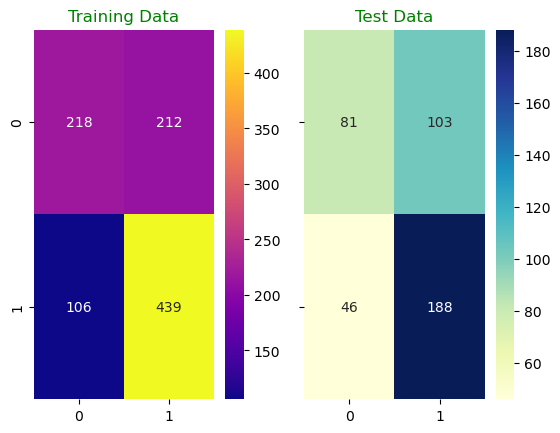

In [64]:
# Evaluation
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(cm, annot=True,fmt='.5g',cmap='plasma',ax=a[0][0]);
a[0][0].set_title('Training Data',color='green')

plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');




**Classification Report:**

In [65]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.51      0.58       430
           1       0.67      0.81      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.67      0.67       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.44      0.52       184
           1       0.65      0.80      0.72       234

    accuracy                           0.64       418
   macro avg       0.64      0.62      0.62       418
weighted avg       0.64      0.64      0.63       418
 



In [67]:
# Training Data Probability Prediction
pred_prob_train = lda_model.predict_proba(X_train) # predict_proba gives the predicted probabilities 

# Test Data Probability Prediction
pred_prob_test = lda_model.predict_proba(X_test) # predict_proba gives the predicted probabilities 

**AUC and ROC for the training and Test data ~ Repaeter Operator Curve**

AUC for the Training Data: 0.720
AUC for the Test Data: 0.663


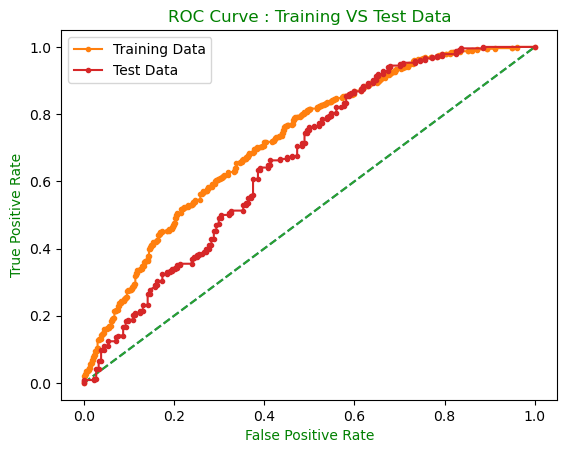

In [87]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,marker='.',label = 'Training Data')

# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

plt.title("ROC Curve : Training VS Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Inferences:**

* AUC for the Training Data: 0.720
* AUC for the Test Data: 0.663

**For predicting Contraceptive_method_used = yes(label 1)**

* **Precision(65%)** -- 65% of the Women predicted are actually using Contracepltive_method out of all the women predicted that use Contraceptive.
* **Recall(80%)** -- Out of all the Women using Contraceptives 79% of the Women have been predicted correctly.

**For predicting Contraceptive_method_used = No(label 0)**

* **Precision(64)** -- 64% of the Women predicted are actually not using Contracepltive_method out of all the women predicted that don't use Contraceptive.
* **Recall(44%)** -- Out of all the Women not using Contraceptives 46% of the Women have been predicted correctly.

**Overall accuracy of the model – 67 % of total predictions are correct.**


## Classification by Discriminant Score

**Discriminant_Score:**

In [58]:
lda_model.transform(X_train).ravel() # looking at the discriminant values

array([-0.04999935, -2.78584619, -2.7554268 , -1.53202815,  0.07274526,
       -1.19869977, -1.1308908 , -0.05459176, -2.96335267, -1.97843726,
       -1.6023438 , -2.36711125, -1.33075257, -3.11996996, -3.30343498,
       -2.39693201, -2.35966065, -0.81154635, -0.63145465, -2.22042434,
       -1.77640843, -1.73509256, -2.03625278,  0.94017459, -1.04993574,
       -0.74154095, -1.66990852, -0.42209554, -0.12824135, -1.47764554,
       -0.27782705, -1.02180332, -0.16203787, -1.94763257, -1.18340235,
       -2.21574585,  0.12487239, -1.10503642, -1.17943596, -2.05749066,
       -1.99576099, -0.79910761,  0.61579691, -1.10712102, -0.03073832,
       -0.64242696, -2.17635147, -0.28924122, -1.31922274, -2.32124931,
        0.4925776 , -1.80281492, -2.52004886, -0.24436375, -1.43325063,
       -1.65855617, -1.83124536, -0.82713048, -0.29127433, -2.04298863,
       -2.41537484, -1.03408575,  0.20750687, -1.36178478, -1.05964641,
       -0.59943575, -1.46164211,  0.5701258 ,  0.12059771,  0.28

In [56]:
vdf = pd.DataFrame({'Discriminant_Score':lda_model.transform(X_train).ravel(),'Churn':y_train.values})
vdf

,Discriminant_Score,Churn
0,-0.049999,0
1,-2.785846,1
2,-2.755427,1
3,-1.532028,1
4,0.072745,0
...,...,...
970,-0.805554,0
971,-0.576171,0
972,-1.491178,0
973,-1.657817,1


In [59]:
lda_model.coef_

array([[-0.07343103,  0.51899846,  0.04072975,  0.32195703,  0.13827657,
         0.32011782, -0.44870113, -0.17080091, -0.3527286 ]])

In [74]:
X.shape

(1393, 9)

In [76]:
lda_model.intercept_

array([-0.86394156])

**Conclusions:**

* Accuracy on the Training Data: 67%
* Accuracy on the Test Data: 64%

* AUC on the Training Data: 72%
* AUC on the Test: 66%

## CART : Performance Matrix

**Prediction and Evaluation on both Training and Test Set using Confusion Matrix, Classification Report and AUC-ROC.**

**Accuracy of the Train and Test Dataset:**

In [44]:
print("Accuracy of Training data: ",cart_dt_model.score(X_train, train_labels))
print("Accuracy of Test data: ", cart_dt_model.score(X_test, test_labels))

Accuracy of Training data:  0.7333333333333333
Accuracy of Test data:  0.6722488038277512


**Variable Importance:**

In [45]:
cart_dt_model.feature_importances_

array([0.29676538, 0.16195074, 0.03818962, 0.46156599, 0.01518768,
       0.02634059, 0.        , 0.        , 0.        ])

In [46]:
print(pd.DataFrame(cart_dt_model.feature_importances_, columns=['Imp'], index=X_train.columns))

                                  Imp
Wife_age                     0.296765
Wife_ education              0.161951
Husband_education            0.038190
No_of_children_born          0.461566
Husband_Occupation           0.015188
Standard_of_living_index     0.026341
Wife_religion_Scientology    0.000000
Wife_Working_Yes             0.000000
Media_exposure _Not-Exposed  0.000000


**Predicting on Training and Test dataset:**

In [47]:
ytrain_predict = cart_dt_model.predict(X_train)
ytest_predict = cart_dt_model.predict(X_test)

In [48]:
print('ytrain_predict',ytrain_predict[:10])
print('ytest_predict',ytest_predict[:10])

ytrain_predict [0 1 0 1 0 1 1 1 1 0]
ytest_predict [1 1 1 1 1 1 1 0 0 1]


**Getting the Predicted Probabilities:**

In [49]:
ytrain_pred_prob = cart_dt_model.predict_proba(X_train)
ytest_pred_prob = cart_dt_model.predict_proba(X_test)

In [50]:
pd.DataFrame(ytest_pred_prob, columns=['No','Yes']).head()

,No,Yes
0,0.297872,0.702128
1,0.074468,0.925532
2,0.245283,0.754717
3,0.074468,0.925532
4,0.193548,0.806452


### Model Evaluation:

**Measuring AUC-ROC Curve - Training Data**

AUC of Training Data: 0.799


Text(0, 0.5, 'True Positive Rate')

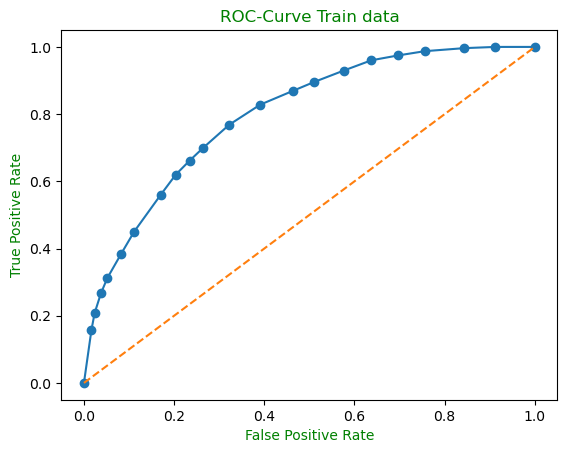

In [79]:
# Gettin the predictions in terms of probability 
probs = cart_dt_model.predict_proba(X_train)[:,1] 
# AUC score
auc = roc_auc_score(train_labels, probs)
print("AUC of Training Data: {:.3f}".format(auc))
# Plot ROC Curve
fpr,tpr,thresholds = roc_curve(train_labels,probs)
roc_data = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Cutoffs':thresholds})
plt.plot(roc_data['FPR'],roc_data['TPR'],marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title( 'ROC-Curve Train data',color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')

**AUC and ROC for the testing data:**

AUC of Test Data: 0.721


Text(0, 0.5, 'True Positive Rate')

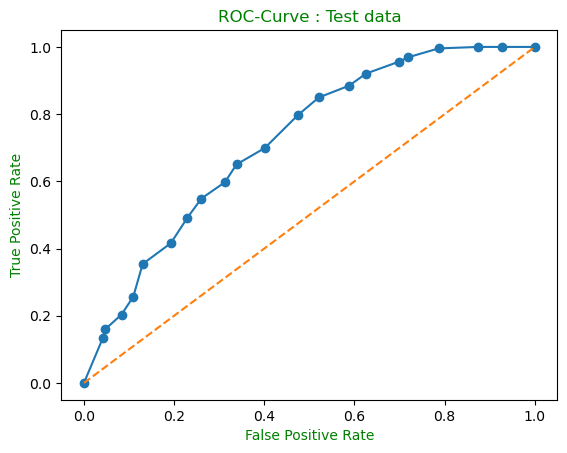

In [80]:
# Gettin the predictions in terms of probability 
probs = cart_dt_model.predict_proba(X_test)[:,1] 
# AUC score
auc = roc_auc_score(test_labels, probs)
print("AUC of Test Data: {:.3f}".format(auc))
# Plot ROC Curve
fpr,tpr,thresholds = roc_curve(test_labels,probs)
roc_data = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Cutoffs':thresholds})
plt.plot(roc_data['FPR'],roc_data['TPR'],marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title( 'ROC-Curve : Test data',color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')

**Confusion Matrix for the training data:**

In [81]:
cm = confusion_matrix(train_labels,ytrain_predict)
cm

array([[257, 165],
       [ 95, 458]], dtype=int64)

**Classification Report of the Training data:**


In [82]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.73      0.61      0.66       422
           1       0.74      0.83      0.78       553

    accuracy                           0.73       975
   macro avg       0.73      0.72      0.72       975
weighted avg       0.73      0.73      0.73       975



**Confusion Matrix for the Test data:**

In [83]:
cm1 = confusion_matrix(test_labels, ytest_predict)
cm1

array([[101,  91],
       [ 46, 180]], dtype=int64)

**Classification Report of the Test data:**


In [84]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60       192
           1       0.66      0.80      0.72       226

    accuracy                           0.67       418
   macro avg       0.68      0.66      0.66       418
weighted avg       0.67      0.67      0.67       418



**Confusion Matrix for Training and Test data:**

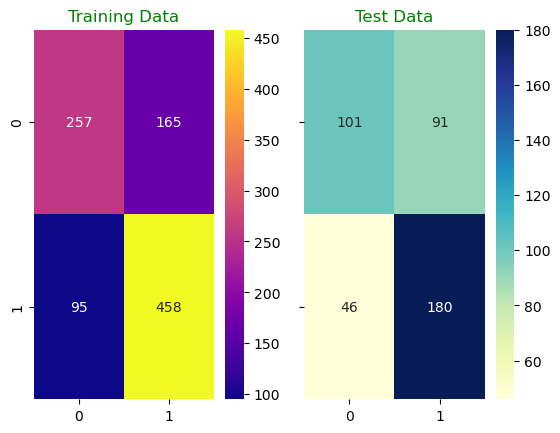

In [85]:
# Evaluation
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(cm, annot=True,fmt='.5g',cmap='plasma',ax=a[0][0]);
a[0][0].set_title('Training Data',color='green')

plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');




**Conclusion:**

* Accuracy on the Training Data: 73.33%
* Accuracy on the Test Data: 67.22%


* AUC on the Training Data: 80%
* AUC on the Test: 72%

* Accuracy, AUC, Precision and Recall for test data is almost inline with training data.
* Wife_age, No_of_children_born, wife_education and Husband_education are the most important features in determining the Contraceptive method used.

**Optimizing CART Model:**

**Applying GridsearchCV on CART Model**

In [51]:
dt_model = DecisionTreeClassifier()
grid = {'criterion':["gini", "entropy", "log_loss"],
       'max_depth':[10,20,30],
       'min_samples_split':[2,3,5,7],
       'min_samples_leaf':[2,3,4,5],
       'min_impurity_decrease':[0.001,0.0001]}
grid_search = GridSearchCV(estimator = dt_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy',verbose=1)
grid_search.fit(X_train,train_labels)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30],
                         'min_impurity_decrease': [0.001, 0.0001],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 5, 7]},
             scoring='accuracy', verbose=1)

In [52]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=10,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       min_samples_split=7)

**Accuracy of the Training and Test data:**

In [53]:
print("Accuracy of Train data: ",best_model.score(X_train,train_labels))
print("Accuracy of Test data: ",best_model.score(X_test,test_labels))

Accuracy of Train data:  0.8112820512820513
Accuracy of Test data:  0.6411483253588517


In [54]:
best_train_pred = best_model.predict(X_train)
best_test_pred = best_model.predict(X_test)

**Classification Report of the Training and Test data:**

In [90]:
print('Classification Report of the training data:\n\n',metrics.classification_report(train_labels,best_train_pred),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(test_labels,best_test_pred),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.76      0.78       422
           1       0.82      0.86      0.84       553

    accuracy                           0.81       975
   macro avg       0.81      0.81      0.81       975
weighted avg       0.81      0.81      0.81       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.63      0.51      0.56       192
           1       0.64      0.75      0.69       226

    accuracy                           0.64       418
   macro avg       0.64      0.63      0.63       418
weighted avg       0.64      0.64      0.63       418
 



**Confusion Matrix of Train and Test Data:**

In [91]:
cm = confusion_matrix(train_labels,best_train_pred)
cm1 = confusion_matrix(test_labels,best_test_pred)

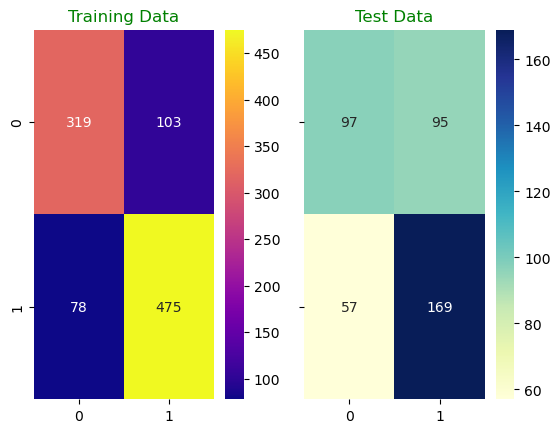

In [92]:
# Evaluation
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(cm, annot=True,fmt='.5g',cmap='plasma',ax=a[0][0]);
a[0][0].set_title('Training Data',color='green')

plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');


In [55]:
# Training Data Probability Prediction
best_prob_train = best_model.predict_proba(X_train) # predict_proba gives the predicted probabilities 

# Test Data Probability Prediction
best_prob_test = best_model.predict_proba(X_test) # predict_proba gives the predicted probabilities 

**AUC-ROC Curve:**

AUC for the Training Data: 0.899
AUC for the Test Data: 0.667


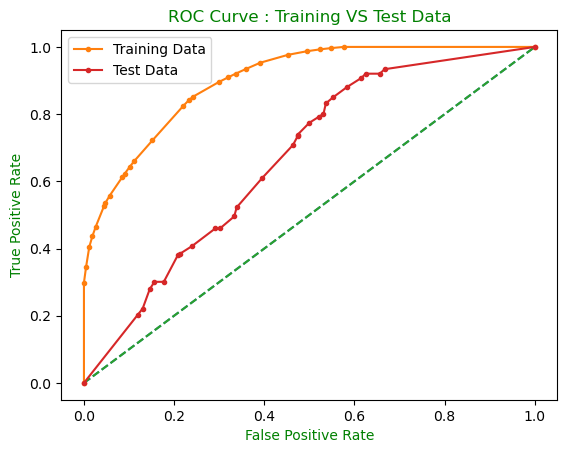

In [56]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
auc = metrics.roc_auc_score(train_labels,best_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(train_labels,best_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,marker='.',label = 'Training Data')

# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(test_labels,best_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(test_labels,best_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

plt.title("ROC Curve : Training VS Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Variable Importance:   Optimized Model**

In [95]:
print(pd.DataFrame(best_model.feature_importances_, columns=['Imp'], index=X_train.columns))

                                  Imp
Wife_age                     0.290017
Wife_ education              0.097229
Husband_education            0.072717
No_of_children_born          0.323562
Husband_Occupation           0.098554
Standard_of_living_index     0.070124
Wife_religion_Scientology    0.012375
Wife_Working_Yes             0.016265
Media_exposure _Not-Exposed  0.019156


* 'Wife_age','No_of_children_born','wife_education' and 'Husband_education'(in same order of preference) are the most important variables in determining if a women uses Contraceptive mathods.

#### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
**Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.**

**Inferences:**

**Comparison Between Models:**

* Cart with stands the top model with Accuracy of 73% on train data and 67% on test data.
* Optimized Logistic Regression Model's Accuracy is 67% on Train data and 65% on Test data same is for LDA model as well.
* CART with GridsearchCV model's Accuracy is 81% on Train data and 63* on test data,The accuracy of test data is not comparable with train data this may be due to Overfitting.

**Comparison in Terms of Accuracy,Recall,Precision and AUC value:**

* The CART model from all the other models seems to be performing the best in terms of Accuracy, Recall and Precision values.
* The CART model also gives the most important features according to which the split in the Decision Tree was made.
* 'Wife_age','No_of_children_born','wife_education' and 'Husband_education'(in same order of preference) are the most important variables in determining if a women uses Contraceptive mathods.

* If we look at the Recall value, the CART model is able to identify 80% of the true positives correctly. The LDA model also gives a similar Recall value of 79%.
* The Accuracy of the CART model is slightly greater than the other two models, therefore it is better to consider the CART model prediction.

* Similarly, we see that the Area Under the Curve (AUC) captured is 80% for train data and 72% for the test data. 
* AUC for the Optimized CART model is 90% for the Train data and 65% for the Test data.
* These values are greater then the other two models.


**Recommendations:**

* We saw that wife_age,No_of_children_born,Wife_education and Husband_education is an important factor in deciding whether to use contraceptives or not.
* Since Uneducated Women tends to use less contraceptive methods there should be a compaign run to educate these women on how and why to use contraceptives.
* People belonging to Very high standard of living use more contraceptives.
* Media Exposure plays an important role in using contraceptives methods.


**Various Steps performed in building Model's:**

* We performed all the Data analysis steps that is required for the model building.
* Train-Test Split is done.
* Applied various Algorithm for model building.
* Checked the performance of various model's using Accuracy ,precision,Recall and AUC score.